In [22]:
#importing required libraries
import cv2 #OpenCV for image processing
import numpy as np #numpy for carrying out operations using arrays
from matplotlib import pyplot as plt #matplotlib to display images and histograms
from google.colab import files #allows user to upload images
from PIL import Image #to open image
import io #handle the data obtained from images

In [23]:
#enables user to upload an image
upload_file = files.upload()
for i in upload_file.keys():
    img = Image.open(io.BytesIO(upload_file[i])) #makes the raw bytes from the uploaded image look like a file
    img = np.array(img) #converts into numpy array for processing



Saving eiffel_tower.jpg to eiffel_tower.jpg


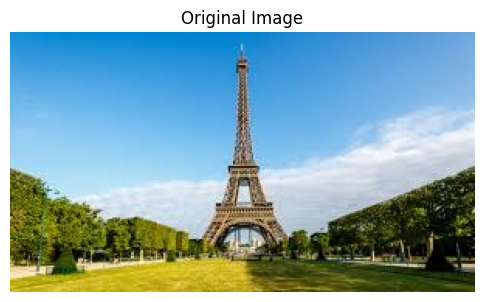

In [24]:
#display the uploaded image
# matplotlib is preferred ahead of Pillow as images can be opened within colab and can be easily customised as per requirements
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()


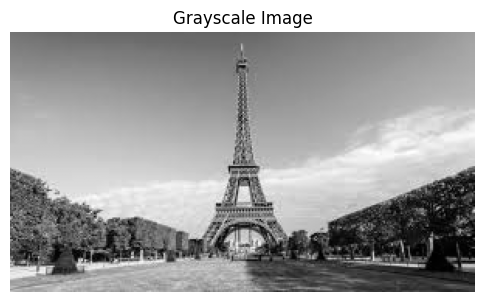

In [25]:
#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #converts from RGB to grayscale
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray') #ensures grayscale display
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


Enter brightness adjustment value (-100 to +100): -90


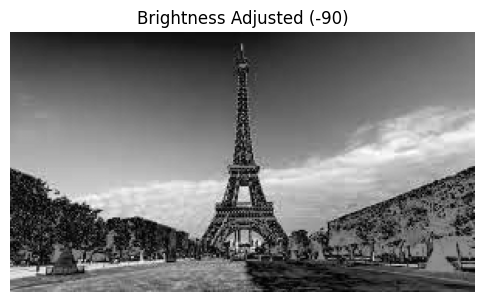

In [26]:
#code to allow user to change the brightness of the grayscale image

def adjust_brightness(image, value):
    # alpha = contrast (1 = no change)
    # beta = brightness value (-100 to +100)
    new_img = cv2.convertScaleAbs(image, alpha=1, beta=value)
    return new_img

# User input
brightness_value = int(input("Enter brightness adjustment value (-100 to +100): "))

# Apply brightness change
bright_img = adjust_brightness(gray, brightness_value)

# Display brightened image
plt.figure(figsize=(6,6))
plt.imshow(bright_img, cmap='gray')
plt.title(f"Brightness Adjusted ({brightness_value})")
plt.axis('off')
plt.show()


Enter contrast factor (e.g., 0.5, 1, 1.5, 2): 1.4


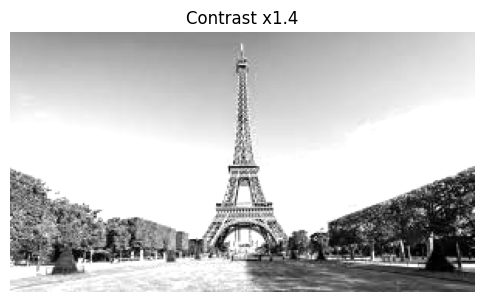

In [27]:
#high contrast -> bright areas become brighter, dark areas become darker; vice-versa for low contrast

def adjust_contrast(image, factor):
    """
    factor > 1  → increase contrast
    factor = 1  → no change
    factor < 1  → reduce contrast
    """
    new_img = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return new_img

#user can input the contrast factor
factor = float(input("Enter contrast factor (e.g., 0.5, 1, 1.5, 2): "))
contrast_img = adjust_contrast(gray, factor)

#displaying the image with changed contrast
plt.figure(figsize=(6,6))
plt.imshow(contrast_img, cmap='gray')
plt.title(f"Contrast x{factor}")
plt.axis('off')
plt.show()

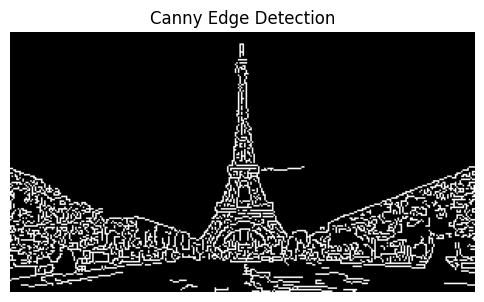

In [28]:
#Canny edge detection detects sharp edges in the image

edges = cv2.Canny(gray, threshold1=100, threshold2=200) #refer to the lower and upper threshold respectively
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

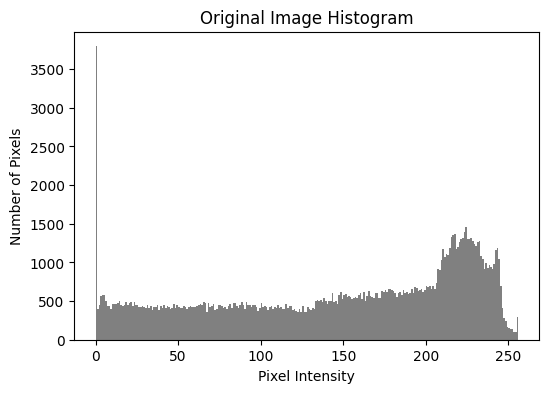

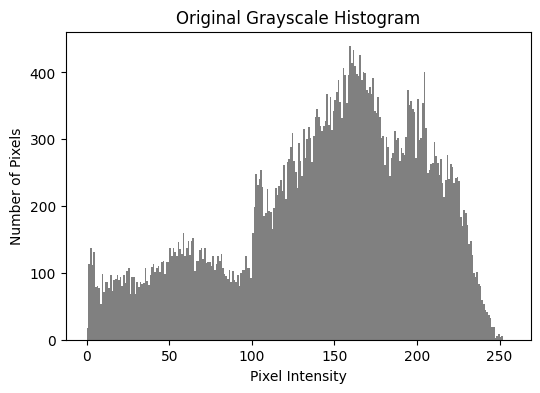

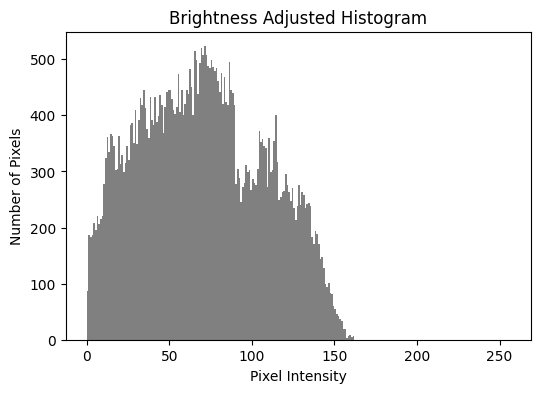

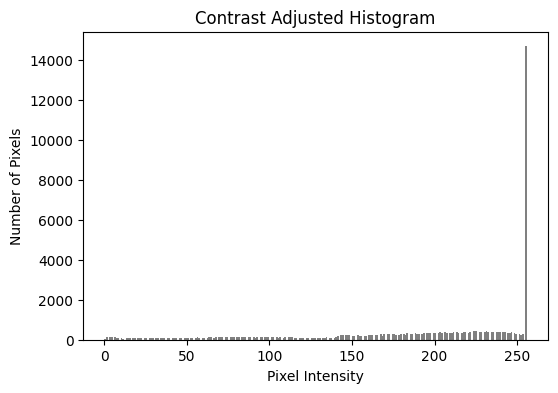

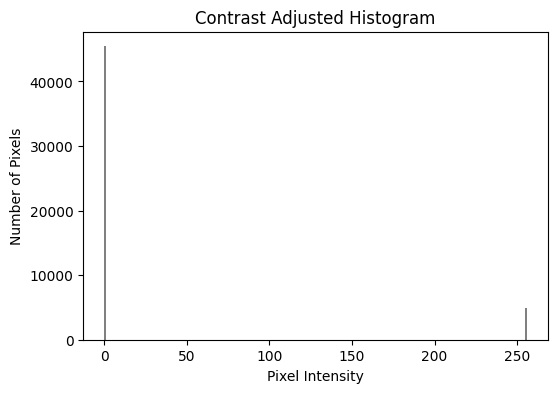

In [29]:
#function to plot pixel intensity histogram

def plot_histogram(image, title="Histogram"):
    plt.figure(figsize=(6,4))
    plt.hist(image.ravel(), bins=256, range=[0,256], color='gray') #image.ravel() flattens the image to 2D; bins divides the pixel intensity range into 256 levels
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Number of Pixels")
    plt.show()

#plotting histogram for each image
plot_histogram(img, "Original Image Histogram")
plot_histogram(gray, "Original Grayscale Histogram")
plot_histogram(bright_img, "Brightness Adjusted Histogram")
plot_histogram(contrast_img, "Contrast Adjusted Histogram")
plot_histogram(edges, "Contrast Adjusted Histogram")